In [16]:
import torch
DATA = 'SVHN'
prefix = 'svhn_dnn_ssim_'
traing = True
epochs = 400
batch_size = 64
leaks_loss = 'SSIM'
print(torch.cuda.get_device_name(0))

Tesla P100-PCIE-16GB


In [17]:
import os
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/MyDrive/Colab Notebooks/BinarizeLocalize/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
pip install import-ipynb

In [19]:
import import_ipynb
os.chdir(root_path + 'library')
Call_Template = True
%run Template.ipynb

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Fetching the dataset and preparing train, validation and test data loaders

In [20]:
(trainSet, validSet, checkSet, testSet,
 trainSetGPU, validSetGPU, checkSetGPU) = load_data_to_gpu()
print(len(trainSet), len(validSet), len(checkSet), len(testSet))

Using downloaded and verified file: /content/gdrive/MyDrive/Colab Notebooks/BinarizeLocalize/data/train_32x32.mat
Using downloaded and verified file: /content/gdrive/MyDrive/Colab Notebooks/BinarizeLocalize/data/test_32x32.mat



73257 18222 7810 26032


##Visualising the data

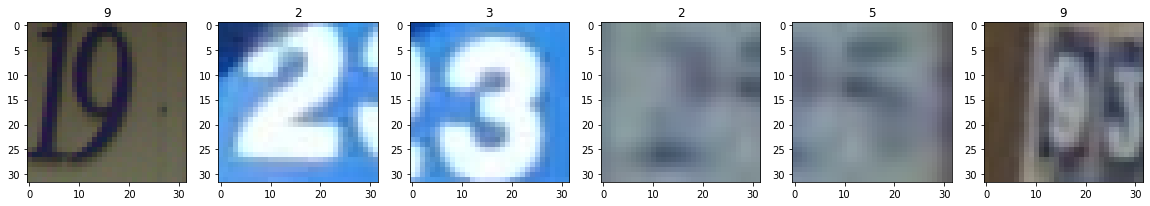

In [21]:
plot_samples(trainSet, None)

In [22]:
class Network(Model):
    def __init__(self):
        super(Network, self).__init__()
        # at client
        self.feature0 = nn.Sequential(
            BinaryConv2d(3, 6, 5, 1, 1), #28
            nn.BatchNorm2d(6),
            BinaryRelu(),
        )
        self.feature1 = nn.Sequential(
            nn.MaxPool2d(2), #14
            nn.Dropout(0.1),
        )
        # at server
        self.feature2 = nn.Sequential(
            nn.Conv2d(6, 16, 5, 1, 0), #10
            nn.ReLU(),
            nn.MaxPool2d(2), #5
            nn.Dropout(0.2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(25 * 16, 120),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(84, 10)
        )

##Defining model object, loss function and optimiser

In [23]:
(model, criterion, dataleaks, optimizer) = init_training(Network())

##Training and Validation

In [24]:
(trainLoss, validLoss, leaksLoss, accuracyList) = train_model(1,1/3)

Saving the model state dictionary for Epoch: 1 with Validation loss: 0.67433530 and Accuracy: 79.48%
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.64892703 and Accuracy: 80.66%
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.62687677 and Accuracy: 81.13%
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.60406363 and Accuracy: 83.16%
Saving the model state dictionary for Epoch: 6 with Validation loss: 0.55601871 and Accuracy: 83.21%
Saving the model state dictionary for Epoch: 7 with Validation loss: 0.55601698 and Accuracy: 83.44%
Saving the model state dictionary for Epoch: 9 with Validation loss: 0.46024808 and Accuracy: 85.94%
Saving the model state dictionary for Epoch: 12 with Validation loss: 0.43788096 and Accuracy: 87.00%
Saving the model state dictionary for Epoch: 34 with Validation loss: 0.42693976 and Accuracy: 87.19%
Saving the model state dictionary for Epoch: 55 with Validation loss: 0.41931358 and Accu

In [25]:
(model, trainLoss, validLoss, leaksLoss, accuracyList) = save_and_load()

Max accuracy is tensor(0.8936, device='cuda:0')


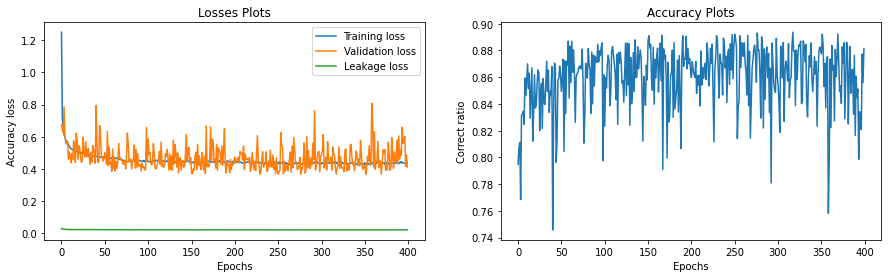

In [26]:
plot_losses()


Test accuracy: 0.8970550576184378


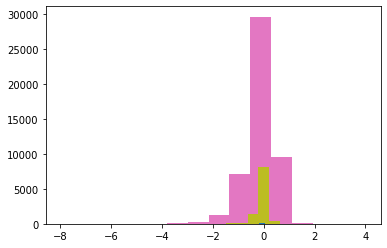

In [27]:
test_model()

##Measuring Privacy Preserving

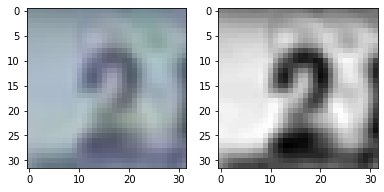

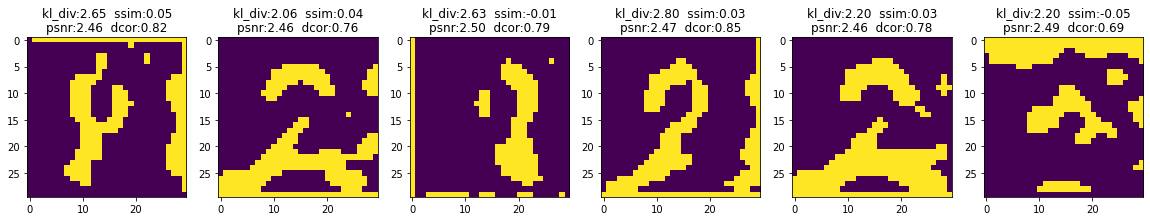

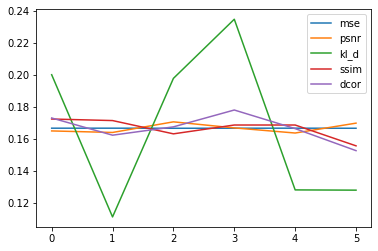

In [28]:
plot_measure(measure_image(testSet[1][0]))


tensor(2.5129, device='cuda:0') 0.7154074461101394 tensor(0.0315, device='cuda:0')


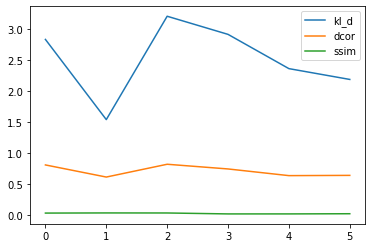

In [29]:
plot_measures(measure_images())